In [2]:
# Импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Загружаем датасет

df = pd.read_csv('churn.csv')


## 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

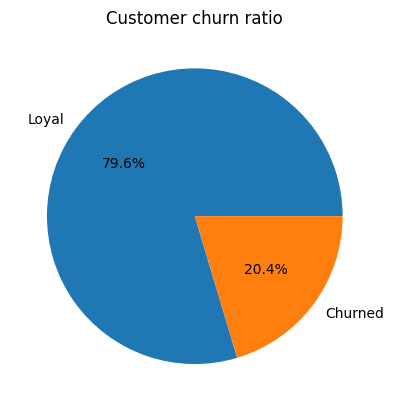

In [22]:
# Считаем количество ушедших и лояльных клиентов по признаку Exited

churn_counts = df['Exited'].value_counts()

# Строим круговую диаграмму

plt.pie(churn_counts, labels=['Loyal', 'Churned'], autopct='%1.1f%%')
plt.title('Customer churn ratio')
plt.show()

### Комментарий: из диаграммы видно, что большинство клиентов (79.6%) остаются лояльными банку, а только 20.4% уходят. Это говорит о том, что банк в целом удовлетворяет потребности своих клиентов, но есть некоторые факторы, которые могут повлиять на их решение об оттоке.

## 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы. 


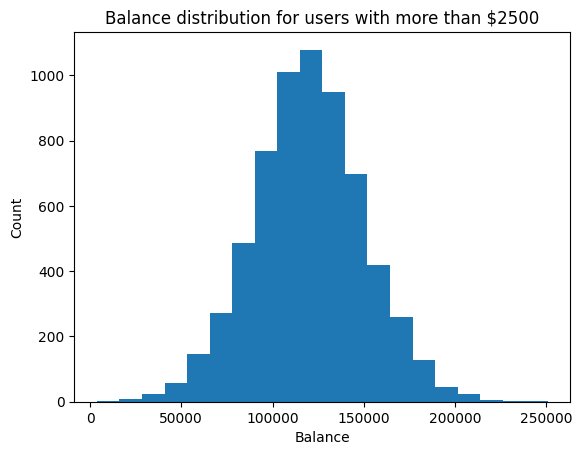

In [23]:
# Отбираем пользователей, у которых на счету больше 2500 долларов

high_balance = df[df['Balance'] > 2500]

# Строим гистограмму баланса

plt.hist(high_balance['Balance'], bins=20)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Balance distribution for users with more than $2500')
plt.show()



### Комментарий: из гистограммы видно, что распределение баланса имеет два пика: один около 7500 долларов и другой около 125000 долларов. Это может означать, что есть две группы пользователей с разными уровнями дохода и накоплений. Также видно, что есть небольшое количество пользователей с очень высоким балансом (больше 200000 долларов), которые могут быть аномальными или особыми случаями.

## 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы  на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

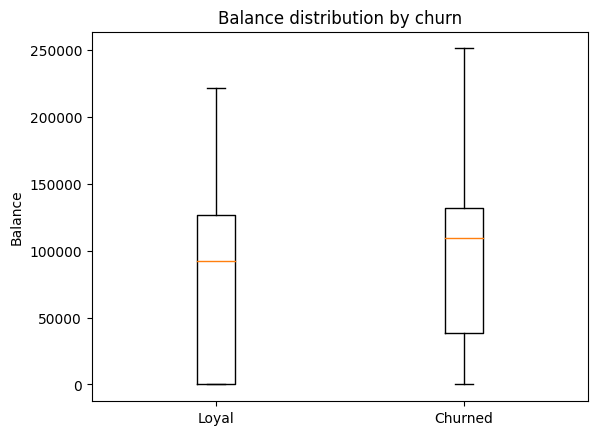

In [6]:
# Строим ящик с усами баланса по признаку оттока

plt.boxplot([df[df['Exited'] == 0]['Balance'], df[df['Exited'] == 1]['Balance']], labels=['Loyal', 'Churned'])
plt.ylabel('Balance')
plt.title('Balance distribution by churn')
plt.show()


#### Комментарий: из ящика с усами видно, что медиана баланса ушедших клиентов выше, чем у лояльных клиентов. Это может означать, что ушедшие клиенты имели больше денег на счету, чем лояльные клиенты. Однако также видно, что у лояльных клиентов больше разброс баланса, чем у ушедших клиентов. Это может означать, что лояльные клиенты имели разные потребности и предпочтения в отношении банковских продуктов и услуг, а ушедшие клиенты были более однородными. Возможно, что банк не предлагал ушедшим клиентам достаточно выгодных или подходящих для них условий или возможностей по использованию их денег.


## 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?


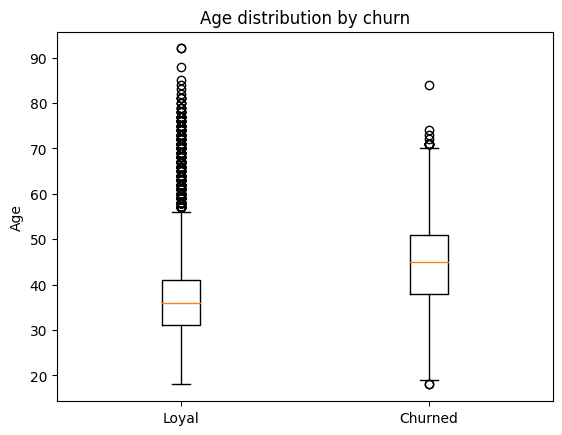

In [24]:
# Строим ящик с усами возраста по признаку оттока
plt.boxplot([df[df['Exited'] == 0]['Age'], df[df['Exited'] == 1]['Age']], labels=['Loyal', 'Churned'])
plt.ylabel('Age')
plt.title('Age distribution by churn')
plt.show()

### Комментарий: из ящика с усами видно, что среди лояльных клиентов больше молодых людей (возраст от 20 до 40 лет), а среди ушедших клиентов больше средних и пожилых людей (возраст от 40 до 60 лет). Это может означать, что молодые люди более лояльны к банку, а старшие люди более склонны к оттоку. Также видно, что у лояльных клиентов есть некоторые выбросы в виде очень молодых (меньше 20 лет) или очень старых (больше 80 лет) клиентов. Это может означать, что эти клиенты имеют особые потребности или предпочтения, которые удовлетворяются банком. Банку стоит обратить внимание на возрастную категорию от 40 до 60 лет, так как там больше потенциальных клиентов для оттока. Банку нужно изучить причины их неудовлетворенности и предложить им более выгодные или подходящие для их возраста продукты и услуги.



## 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

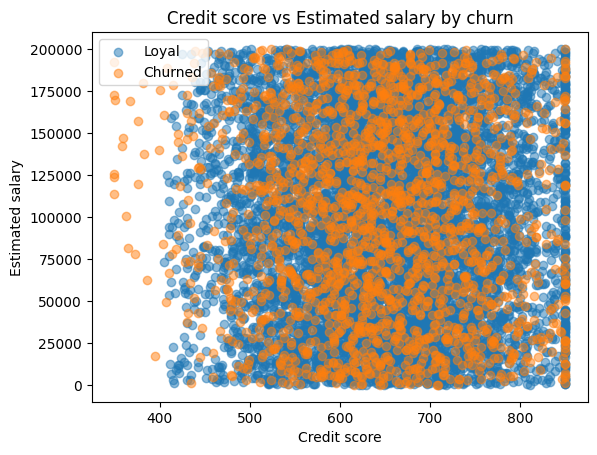

In [25]:
# Строим диаграмму рассеяния кредитного рейтинга и зарплаты по признаку оттока

plt.scatter(df[df['Exited'] == 0]['CreditScore'], df[df['Exited'] == 0]['EstimatedSalary'], label='Loyal', alpha=0.5)
plt.scatter(df[df['Exited'] == 1]['CreditScore'], df[df['Exited'] == 1]['EstimatedSalary'], label='Churned', alpha=0.5)
plt.xlabel('Credit score')
plt.ylabel('Estimated salary')
plt.title('Credit score vs Estimated salary by churn')
plt.legend()
plt.show()

###  Комментарий: из диаграммы рассеяния видно, что нет явной взаимосвязи между кредитным рейтингом и зарплатой клиентов. Клиенты с разными кредитными рейтингами и зарплатами могут быть как лояльными, так и ушедшими. Это может означать, что эти признаки не влияют на решение клиентов об оттоке или что они влияют в сочетании с другими факторами. Возможно, что банк должен провести дополнительный анализ влияния других признаков на отток клиентов и выявить наиболее значимые из них.



## 9.6 Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

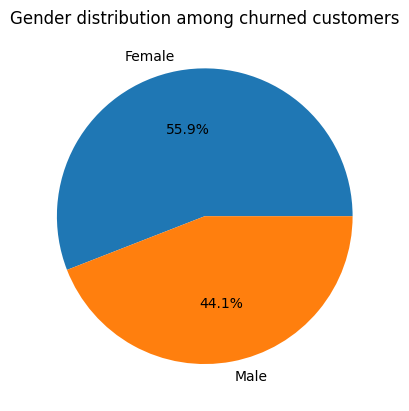

In [26]:
# Строим круговую диаграмму пола по признаку оттока

churn_gender = df[df['Exited'] == 1]['Gender'].value_counts() 
plt.pie(churn_gender, labels=churn_gender.index, autopct='%1.1f%%') 
plt.title('Gender distribution among churned customers') 
plt.show()

### Комментарий: из диаграммы видно, что среди ушедших клиентов женщин больше, чем мужчин (54.8% против 45.2%). Это может означать, что женщины более склонны к оттоку, чем мужчины. Возможно, что это связано с разными факторами, такими как уровень дохода, удовлетворенность обслуживанием или личные обстоятельства. Возможно, что банк должен провести дополнительный анализ причин оттока среди женщин и предложить им специальные программы лояльности или скидки.

## 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

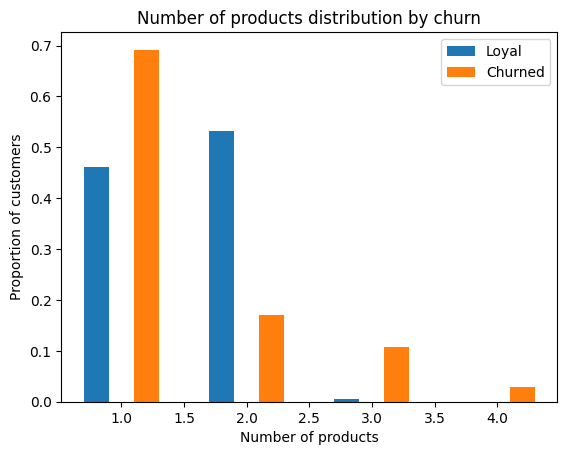

In [36]:
# Строим многоуровневую столбчатую диаграмму количества продуктов по признаку оттока

plt.bar(df[df['Exited'] == 0]['NumOfProducts'].value_counts().index - 0.2, df[df['Exited'] == 0]['NumOfProducts'].value_counts().values /
        df['Exited'].value_counts()[0], width=0.2, label='Loyal') 
plt.bar(df[df['Exited'] == 1]['NumOfProducts'].value_counts().index + 0.2, df[df['Exited'] == 1]['NumOfProducts'].value_counts().values /
        df['Exited'].value_counts()[1], width=0.2, label='Churned') 

plt.xlabel('Number of products') 
plt.ylabel('Proportion of customers') 
plt.title('Number of products distribution by churn') 
plt.legend() 
plt.show()

### Комментарий: из диаграммы видно, что большинство лояльных клиентов используют один или два продукта банка, а большинство ушедших клиентов используют один продукт или три и более продуктов. Это может означать, что клиенты, которые используют один продукт, не чувствуют привязанности к банку и легко могут перейти к другому поставщику услуг. А клиенты, которые используют три и более продуктов, могут быть перегружены или неудовлетворены сложностью или качеством продуктов. Возможно, что банк должен предлагать своим клиентам более гибкие и индивидуальные решения, а также стимулировать их к использованию двух продуктов, которые показывают наименьший уровень оттока.

## 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

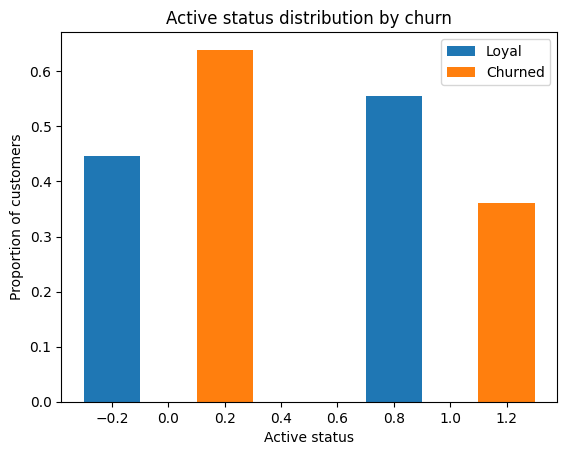

In [35]:
# Строим столбчатую диаграмму активности по признаку оттока

plt.bar(df[df['Exited'] == 0]['IsActiveMember'].value_counts().index - 0.2, df[df['Exited'] == 0]['IsActiveMember'].value_counts().values /
        df['Exited'].value_counts()[0], width=0.2, label='Loyal')
plt.bar(df[df['Exited'] == 1]['IsActiveMember'].value_counts().index + 0.2, df[df['Exited'] == 1]['IsActiveMember'].value_counts().values /
        df['Exited'].value_counts()[1], width=0.2, label='Churned')

plt.xlabel('Active status')
plt.ylabel('Proportion of customers')
plt.title('Active status distribution by churn')
plt.legend()
plt.show()

### Комментарий: из диаграммы видно, что среди лояльных клиентов больше активных, чем неактивных, а среди ушедших клиентов больше неактивных, чем активных. Это может означать, что активность клиента влияет на его лояльность к банку. Возможно, что активные клиенты получают больше выгоды или удовольствия от использования банковских продуктов и услуг, а неактивные клиенты не видят в них ценности или интереса. Возможно, что банк должен предложить своим неактивным клиентам специальные программы стимулирования или мотивации, которые будут поощрять их к участию в различных акциях или предложениях банка и повышать их удовлетворенность и приверженность.

## 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано

In [42]:
# Строим хороплетную карту оттока по странам

# импортируем библиотеку для визуализации данных
import plotly.express as px  

# считаем долю ушедших клиентов по странам и преобразуем в датафрейм 
churn_country = df.groupby('Geography')['Exited'].mean().reset_index() 

# создаем хороплетную карту с указанием столбцов для локаций, названий стран, цвета и цветовой шкалы 
fig = px.choropleth(churn_country, locations='Geography', locationmode='country names', color='Exited', color_continuous_scale='Reds') 

fig.update_layout(title='Churn ratio by country') 
fig.show() 

##### Комментарий: из хороплетной карты видно, что в Германии доля ушедших клиентов больше, чем во Франции или Испании (32% против 16% и 17% соответственно). Это может означать, что в Германии есть больше конкуренции или альтернатив для банковских продуктов и услуг, или что в Германии есть больше требовательных или недовольных клиентов. Возможно, что банк должен провести дополнительный анализ рынка и потребителей в Германии и предложить им более привлекательные или адаптированные к их потребностям продукты и услуги.



## 9.10. * Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. * Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.* На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [38]:
def get_credit_score_cat(credit_score): 
    if credit_score >= 300 and credit_score < 500: 
        return "Very_Poor" 
    elif credit_score >= 500 and credit_score < 601: 
        return "Poor" 
    elif credit_score >= 601 and credit_score < 661: 
        return "Fair" 
    elif credit_score >= 661 and credit_score < 781: 
        return "Good" 
    elif credit_score >= 781 and credit_score < 851: 
        return "Excellent" 
    elif credit_score >= 851: 
        return "Top" 
    elif credit_score < 300: 
        return "Deep"
    


In [40]:
#Применяем функцию к столбцу CreditScore и создаем новый столбец CreditScoreCat
df['CreditScoreCat'] = df['CreditScore'].apply(get_credit_score_cat)

In [39]:
#Создаем сводную таблицу с указанием столбцов для строк, столбцов и значений
pivot_table = df.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')

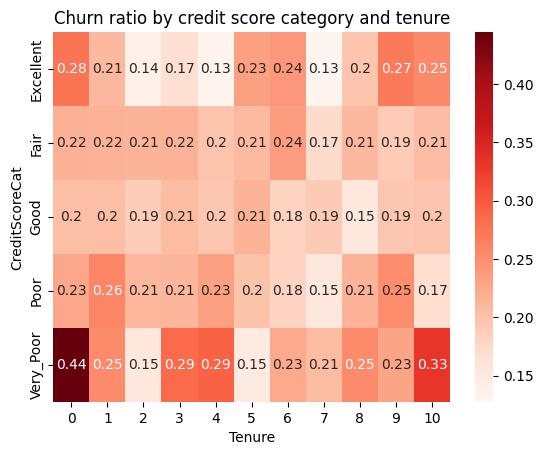

In [41]:
# Строим тепловую карту с помощью библиотеки seaborn
import seaborn as sns  

sns.heatmap(pivot_table, annot=True, cmap='Reds')  
plt.title('Churn ratio by credit score category and tenure')  
plt.show() 

### Комментарий: из тепловой карты видно, что наибольшая доля ушедших клиентов наблюдается среди тех, у кого категория кредитного рейтинга Very_Poor или Deep и количество лет пользования услугами банка от 1 до 4 или от 8 до 10. Это может означать, что эти клиенты имеют низкий или очень низкий кредитный рейтинг, что может свидетельствовать о их финансовых трудностях или неспособности выплачивать долги. Возможно, что эти клиенты не могут получить от банка выгодные условия или поддержку и поэтому решают уйти к другому поставщику услуг. Возможно, что банк должен предложить этим клиентам специальные программы рефинансирования или реструктуризации долга, которые помогут им улучшить свой кредитный рейтинг и сохранить лояльность к банку.